In [1]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import re
import funciones as fn

import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints

pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df

In [2]:
#Leemos los archivos
estadio = pd.read_csv(r'../data/stadiums.csv')
match = pd.read_csv(r'../data/matches.csv')
team = pd.read_csv(r'../data/teams.csv')
player = pd.read_csv(r'../data/players.csv')

### LIMPIAMOS ESTADIO

In [3]:
estadio.head()

,Unnamed: 0,Estadio,Capacidad,Equipo
0,0,Camp Nou,"99,354",Barcelona
1,1,Santiago Bernabeu,81.044,Real Madrid
2,2,Estadio Metropolitano,68.456,Atletico Madrid
3,3,Benito Villamarín,60.721,Real Betis
4,4,Lluís Companys,"60,713",FC Penger


In [4]:
estadio.columns = ['Id', 'Stadium', 'Capacity', 'Team']

In [5]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        66 non-null     int64 
 1   Stadium   66 non-null     object
 2   Capacity  66 non-null     object
 3   Team      66 non-null     object
dtypes: int64(1), object(3)
memory usage: 14.6 KB


In [6]:
lista=[]
for x in estadio.Capacity:
    x = x.replace('.', '').replace(',', '')
    x = int(x)
    lista.append(x)
estadio.Capacity = lista
estadio.head()

,Id,Stadium,Capacity,Team
0,0,Camp Nou,99354,Barcelona
1,1,Santiago Bernabeu,81044,Real Madrid
2,2,Estadio Metropolitano,68456,Atletico Madrid
3,3,Benito Villamarín,60721,Real Betis
4,4,Lluís Companys,60713,FC Penger


In [7]:
estadio.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        66 non-null     int64 
 1   Stadium   66 non-null     object
 2   Capacity  66 non-null     int64 
 3   Team      66 non-null     object
dtypes: int64(2), object(2)
memory usage: 11.1 KB


'N nan cols: 0'

Series([], dtype: float64)

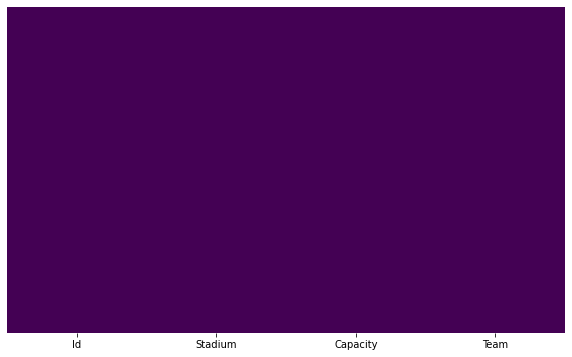

In [8]:
fn.check_nan(estadio)

In [9]:
fn.check_value(estadio, estadio.columns) 

0     1
49    1
35    1
36    1
37    1
Name: Id, dtype: int64
Camp Nou                  1
Montilivi                 1
Carlos Belmonte           1
Coliseum Alfonso Pérez    1
El Helmántico             1
Name: Stadium, dtype: int64
10000    3
81044    1
19336    1
17524    1
17393    1
Name: Capacity, dtype: int64
Barcelona       1
Girona          1
Albacete        1
Getafe          1
Salamanca CF    1
Name: Team, dtype: int64


In [10]:
fn.check_unique(estadio, estadio.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
['Camp Nou' 'Santiago Bernabeu' 'Estadio Metropolitano'
 'Benito Villamarín' 'Lluís Companys' 'La Cartuja' 'San Mamés' 'Mestalla'
 'Ramón Sánchez Pizjuán' 'Estadio RCDE' 'Anoeta' 'Martínez Valero'
 'La Romareda' 'Abanca Riazor' 'Gran Canaria' 'Nueva Condomina'
 'Carlos Tartiere' 'La Rosaleda' 'José Rico Pérez' 'El Molinón' 'Balaídos'
 'José Zorrilla' 'Ciutat de Valencia' 'Ramón de Carranza' 'El Sadar'
 'Estadio de la Cerámica' 'Son Moix' 'Heliodoro Rodríguez López'
 'El Sardinero' 'Nuevo Colombino' 'Estadio del Mediterráneo'
 'Nuevo Arcángel' 'Chapín' 'Mendizorrotza' 'Los Cármenes'
 'Carlos Belmonte' 'Coliseum Alfonso Pérez' 'El Helmántico'
 'Municipal La Línea' 'Estadio Las Gaunas' 'Nuevo Vivero' 'Cartagonova'
 'Romano' 'Nou Estadi' 'Vallecas' 'Castalia' 'El Soto' "Camp d'esports"
 'Jua

In [11]:
estadio.duplicated().any() #No hay duplicados

False

In [12]:
estadio.tail() #Limpios

,Id,Stadium,Capacity,Team
61,61,Ciudad de Málaga ( es ),10816,Atletismo
62,62,Pasarón,10500,Pontevedra
63,63,Álvarez Claro,10000,Melilla
64,64,Linarejos,10000,Linares
65,65,Las Mestas,10000,Marineros de Gijón (fútbol americano) CSI Gijó...


### LIMPIAMOS TEAM

In [13]:
team.tail()

,Unnamed: 0,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
37,37,Sporting Gijón,28,27.7,45.5,18,198,"1,620",18.0,21,13,20,1,1,40,0,1.17,0.72,1.89,1.11,1.83
38,38,Tenerife,28,28.6,47.1,18,198,"1,620",18.0,17,11,14,3,3,46,4,0.94,0.61,1.56,0.78,1.39
39,39,UD Ibiza,26,26.7,46.3,18,198,"1,620",18.0,11,8,10,1,1,57,4,0.61,0.44,1.06,0.56,1.00
40,40,Villarreal B,27,22.4,51.2,18,198,"1,620",18.0,20,14,19,1,2,47,3,1.11,0.78,1.89,1.06,1.83
41,41,Zaragoza,27,27.1,55.4,19,209,"1,710",19.0,13,11,13,0,0,47,3,0.68,0.58,1.26,0.68,1.26


In [14]:
team.columns = ['Id', 'Team', 'Pl', 'Age', 'Poss', 'Pj', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR', 'Gls/Pj',
       'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [15]:
team.tail()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
37,37,Sporting Gijón,28,27.7,45.5,18,198,"1,620",18.0,21,13,20,1,1,40,0,1.17,0.72,1.89,1.11,1.83
38,38,Tenerife,28,28.6,47.1,18,198,"1,620",18.0,17,11,14,3,3,46,4,0.94,0.61,1.56,0.78,1.39
39,39,UD Ibiza,26,26.7,46.3,18,198,"1,620",18.0,11,8,10,1,1,57,4,0.61,0.44,1.06,0.56,1.00
40,40,Villarreal B,27,22.4,51.2,18,198,"1,620",18.0,20,14,19,1,2,47,3,1.11,0.78,1.89,1.06,1.83
41,41,Zaragoza,27,27.1,55.4,19,209,"1,710",19.0,13,11,13,0,0,47,3,0.68,0.58,1.26,0.68,1.26


In [16]:
team.info(memory_usage='deep') #Min a Int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        42 non-null     int64  
 1   Team      42 non-null     object 
 2   Pl        42 non-null     int64  
 3   Age       42 non-null     float64
 4   Poss      42 non-null     float64
 5   Pj        42 non-null     int64  
 6   Starts    42 non-null     int64  
 7   Min       42 non-null     object 
 8   90s       42 non-null     float64
 9   Gls       42 non-null     int64  
 10  Ast       42 non-null     int64  
 11  GNP       42 non-null     int64  
 12  GP        42 non-null     int64  
 13  PS        42 non-null     int64  
 14  CrdY      42 non-null     int64  
 15  CrdR      42 non-null     int64  
 16  Gls/Pj    42 non-null     float64
 17  Ast/Pj    42 non-null     float64
 18  G+A       42 non-null     float64
 19  GNP/Pj    42 non-null     float64
 20  G+A-P/Pj  42 non-null     float64


In [17]:
lista= []
for x in team.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
team.Min = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Almería,26,26.6,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00
1,1,Athletic Club,25,28.0,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71
2,2,Atlético Madrid,23,29.1,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57
3,3,Barcelona,25,26.5,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00
4,4,Betis,27,28.9,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57


'N nan cols: 0'

Series([], dtype: float64)

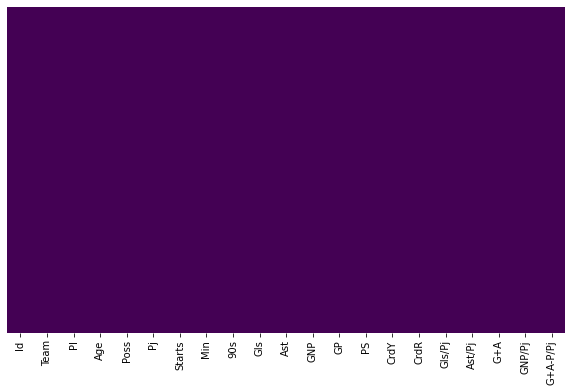

In [18]:
fn.check_nan(team)

In [19]:
fn.check_value(team, team.columns) 

0     1
31    1
23    1
24    1
25    1
Name: Id, dtype: int64
Almería        1
Levante        1
Burgos         1
Cartagena      1
CD Mirandés    1
Name: Team, dtype: int64
26    9
25    8
27    6
23    5
24    5
Name: Pl, dtype: int64
27.8    4
26.5    3
28.6    3
28.4    2
27.1    2
Name: Age, dtype: int64
52.4    2
58.0    2
43.4    2
41.8    2
51.9    1
Name: Poss, dtype: int64
14    20
18    16
19     6
Name: Pj, dtype: int64
154    20
198    16
209     6
Name: Starts, dtype: int64
1260    20
1620    16
1710     6
Name: Min, dtype: int64
14.0    20
18.0    16
19.0     6
Name: 90s, dtype: int64
20    7
16    4
13    4
21    4
14    3
Name: Gls, dtype: int64
14    5
10    5
9     5
12    4
15    4
Name: Ast, dtype: int64
18    8
16    6
13    5
12    5
19    3
Name: GNP, dtype: int64
2    11
0    10
1     9
3     6
4     5
Name: GP, dtype: int64
2    12
3     8
1     8
0     5
5     5
Name: PS, dtype: int64
47    3
43    3
45    3
46    3
32    2
Name: CrdY, dtype: int64
3    13
4  

In [20]:
fn.check_unique(team, team.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
['Almería' 'Athletic Club' 'Atlético Madrid' 'Barcelona' 'Betis' 'Cádiz'
 'Celta Vigo' 'Elche' 'Espanyol' 'Getafe' 'Girona' 'Mallorca' 'Osasuna'
 'Rayo Vallecano' 'Real Madrid' 'Real Sociedad' 'Sevilla' 'Valencia'
 'Valladolid' 'Villarreal' 'Alavés' 'Albacete' 'Andorra' 'Burgos'
 'Cartagena' 'CD Mirandés' 'Eibar' 'Granada' 'Huesca' 'Las Palmas'
 'Leganés' 'Levante' 'Lugo' 'Málaga' 'Oviedo' 'Ponferradina' 'Racing Sant'
 'Sporting Gijón' 'Tenerife' 'UD Ibiza' 'Villarreal B' 'Zaragoza']
[26 25 23 27 21 24 22 28 31]
[26.6 28.  29.1 26.5 28.9 29.3 27.7 28.2 27.8 28.4 28.6 27.9 26.1 29.4
 24.5 29.  26.8 27.1 25.7 27.3 31.  24.1 28.5 28.8 27.6 30.2 26.9 26.7
 22.4]
[45.1 52.4 49.8 64.3 50.1 40.6 51.5 43.4 42.5 39.  52.7 41.2 46.1 53.9
 58.  56.  54.4 48.2 52.8 50.  66.4 41.8 53.4 49.3 53.6 55.5 64.7 52.9
 51.9 40.5 43.6 53.  40.2 45.5 47.1 46.3 51.2 55.4]
[14 18 19]

In [21]:
team.Team.unique()

array(['Almería', 'Athletic Club', 'Atlético Madrid', 'Barcelona',
       'Betis', 'Cádiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe',
       'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
       'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal',
       'Alavés', 'Albacete', 'Andorra', 'Burgos', 'Cartagena',
       'CD Mirandés', 'Eibar', 'Granada', 'Huesca', 'Las Palmas',
       'Leganés', 'Levante', 'Lugo', 'Málaga', 'Oviedo', 'Ponferradina',
       'Racing Sant', 'Sporting Gijón', 'Tenerife', 'UD Ibiza',
       'Villarreal B', 'Zaragoza'], dtype=object)

In [22]:
lista = []
for x in team.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
team.Team = lista
team.Team.unique()

array(['Almeria', 'Athletic Club', 'Atletico Madrid', 'Barcelona',
       'Betis', 'Cadiz', 'Celta Vigo', 'Elche', 'Espanyol', 'Getafe',
       'Girona', 'Mallorca', 'Osasuna', 'Rayo Vallecano', 'Real Madrid',
       'Real Sociedad', 'Sevilla', 'Valencia', 'Valladolid', 'Villarreal',
       'Alaves', 'Albacete', 'Andorra', 'Burgos', 'Cartagena',
       'CD Mirandes', 'Eibar', 'Granada', 'Huesca', 'Las Palmas',
       'Leganes', 'Levante', 'Lugo', 'Malaga', 'Oviedo', 'Ponferradina',
       'Racing Sant', 'Sporting Gijon', 'Tenerife', 'UD Ibiza',
       'Villarreal B', 'Zaragoza'], dtype=object)

In [23]:
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Real Betis',
       'FC Penger', 'Ninguno', 'Athletic de bilbao', 'Valencia',
       'Sevilla', 'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'las Palmas', 'Murcia', 'Oviedo', 'Málaga',
       'Hércules', 'Sporting de Gijón', 'Celta de Vigo', 'Valladolid',
       'Levante', 'Cádiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing de Santander', 'Recreativo', 'Almería',
       'Córdoba', 'Xerez', 'Alavés', 'Granada', 'Albacete', 'Getafe',
       'Salamanca CF', 'Linense', 'UD Logroñés Logroño', 'Badajoz',
       'Cartagena', 'Mérida', 'Gimnàstic', 'Rayo Vallecano', 'Castellón',
       'Móstoles', 'Lleida Esportiu', 'Almería (rugby)', 'Girona',
       'Cultural Leonesa', 'Burgos Real Burgos', 'Jaén', 'Leganés',
       'Cisneros (rugby)', 'Racing Ferrol', 'Compostela', 'Sabadell',
       'Extremadura', 'Terrassa', 'Tudelano', 'Atletismo', 'Pontevedra',
       'Melilla', 'Linares',
    

In [24]:
lista = []
for x in estadio.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
estadio.Team = lista
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Real Betis',
       'FC Penger', 'Ninguno', 'Athletic de bilbao', 'Valencia',
       'Sevilla', 'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'las Palmas', 'Murcia', 'Oviedo', 'Malaga',
       'Hercules', 'Sporting de Gijon', 'Celta de Vigo', 'Valladolid',
       'Levante', 'Cadiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing de Santander', 'Recreativo', 'Almeria',
       'Cordoba', 'Xerez', 'Alaves', 'Granada', 'Albacete', 'Getafe',
       'Salamanca CF', 'Linense', 'UD Logroñes Logroño', 'Badajoz',
       'Cartagena', 'Merida', 'Gimnàstic', 'Rayo Vallecano', 'Castellon',
       'Mostoles', 'Lleida Esportiu', 'Almeria (rugby)', 'Girona',
       'Cultural Leonesa', 'Burgos Real Burgos', 'Jaen', 'Leganes',
       'Cisneros (rugby)', 'Racing Ferrol', 'Compostela', 'Sabadell',
       'Extremadura', 'Terrassa', 'Tudelano', 'Atletismo', 'Pontevedra',
       'Melilla', 'Linares',
    

In [25]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Betis',
 'Celta Vigo',
 'Andorra',
 'Burgos',
 'CD Mirandes',
 'Eibar',
 'Huesca',
 'Las Palmas',
 'Lugo',
 'Ponferradina',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza',
 'Villarreal B']

In [26]:
lista = []
for x in estadio.Team:
    x = x.replace('Athletic de bilbao','Athletic Club').replace('Real Betis', 'Betis').replace('Celta de Vigo', 'Celta Vigo')
    x = x.replace('Burgos Real Burgos', 'Burgos').replace('las Palmas', 'Las Palmas').replace('Racing de Santander', 'Racing Sant')
    x = x.replace('Sporting de Gijon', 'Sporting Gijon')
    lista.append(x)
estadio.Team = lista
estadio.Team.unique()

array(['Barcelona', 'Real Madrid', 'Atletico Madrid', 'Betis',
       'FC Penger', 'Ninguno', 'Athletic Club', 'Valencia', 'Sevilla',
       'Espanyol', 'Real Sociedad', 'Elche', 'Zaragoza',
       'Deportivo La Coruña', 'Las Palmas', 'Murcia', 'Oviedo', 'Malaga',
       'Hercules', 'Sporting Gijon', 'Celta Vigo', 'Valladolid',
       'Levante', 'Cadiz', 'Osasuna', 'Villarreal', 'Mallorca',
       'Tenerife', 'Racing Sant', 'Recreativo', 'Almeria', 'Cordoba',
       'Xerez', 'Alaves', 'Granada', 'Albacete', 'Getafe', 'Salamanca CF',
       'Linense', 'UD Logroñes Logroño', 'Badajoz', 'Cartagena', 'Merida',
       'Gimnàstic', 'Rayo Vallecano', 'Castellon', 'Mostoles',
       'Lleida Esportiu', 'Almeria (rugby)', 'Girona', 'Cultural Leonesa',
       'Burgos', 'Jaen', 'Leganes', 'Cisneros (rugby)', 'Racing Ferrol',
       'Compostela', 'Sabadell', 'Extremadura', 'Terrassa', 'Tudelano',
       'Atletismo', 'Pontevedra', 'Melilla', 'Linares',
       'Marineros de Gijon (futbol americano) C

In [27]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

['Andorra',
 'CD Mirandes',
 'Eibar',
 'Huesca',
 'Lugo',
 'Ponferradina',
 'UD Ibiza',
 'Villarreal B']

In [28]:
filas = [{'Id': 66, 'Stadium': 'Estadio Nacional', 'Capacity':3306, 'Team': 'Andorra'},
         {'Id': 67, 'Stadium': 'Estadio Municipal de Anduva', 'Capacity':5759, 'Team': 'CD Mirandes'},
         {'Id': 68, 'Stadium': 'Estadio Municipal de Ipurúa', 'Capacity':8164, 'Team': 'Eibar'},
         {'Id': 69, 'Stadium': 'El Alcoraz', 'Capacity':9100, 'Team': 'Huesca'},
         {'Id': 70, 'Stadium': 'Estadio Ángel Carro', 'Capacity':7114, 'Team': 'Lugo'},
         {'Id': 71, 'Stadium': 'Estadio Municipal El Toralín', 'Capacity':8400, 'Team': 'Ponferradina'},
         {'Id': 72, 'Stadium': 'Estadio Palladium Can Misses', 'Capacity':6000, 'Team': 'UD Ibiza'},
         {'Id': 73, 'Stadium': 'Ciudad Deportiva del Villarreal', 'Capacity':5000, 'Team': 'Villarreal B'}]
estadio = estadio.append(filas, ignore_index=True)
estadio.tail()

,Id,Stadium,Capacity,Team
69,69,El Alcoraz,9100,Huesca
70,70,Estadio Ángel Carro,7114,Lugo
71,71,Estadio Municipal El Toralín,8400,Ponferradina
72,72,Estadio Palladium Can Misses,6000,UD Ibiza
73,73,Ciudad Deportiva del Villarreal,5000,Villarreal B


In [29]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in estadio.Team.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [30]:
estadio.Team

0           Barcelona
1         Real Madrid
2     Atletico Madrid
3               Betis
4           FC Penger
           ...       
69             Huesca
70               Lugo
71       Ponferradina
72           UD Ibiza
73       Villarreal B
Name: Team, Length: 74, dtype: object

In [31]:
lista = []
for x in team.Team:
    for pos, i in enumerate(estadio.Team):
        if x == i:
            lista.append(pos)
        else:
            continue
team["Id_Stadium"] = lista
team.head()

,Id,Team,Pl,Age,Poss,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Stadium
0,0,Almeria,26,26.6,45.1,14,154,1260,14.0,16,12,16,0,0,47,3,1.14,0.86,2.00,1.14,2.00,30
1,1,Athletic Club,25,28.0,52.4,14,154,1260,14.0,23,17,21,2,3,23,1,1.64,1.21,2.86,1.50,2.71,6
2,2,Atletico Madrid,23,29.1,49.8,14,154,1260,14.0,20,16,20,0,0,43,2,1.43,1.14,2.57,1.43,2.57,2
3,3,Barcelona,25,26.5,64.3,14,154,1260,14.0,33,23,33,0,1,33,3,2.36,1.64,4.00,2.36,4.00,0
4,4,Betis,27,28.9,50.1,14,154,1260,14.0,16,9,13,3,3,33,7,1.14,0.64,1.79,0.93,1.57,3


### LIMPIAMOS PLAYERS

In [32]:
player.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-040,1991.0,10.0,7.0,551,6.1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-220,1996.0,13.0,8.0,747,8.3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-069,1995.0,14.0,14.0,"1,260",14.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-356,1997.0,14.0,14.0,"1,260",14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-352,1997.0,6.0,2.0,238,2.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00


In [33]:
player.columns = ['Id', 'Player', 'Nation', 'Pos', 'Team', 'Age', 'Born', 'Pj',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY',
       'CrdR', 'Gls/Pj', 'Ast/Pj', 'G+A', 'GNP/Pj', 'G+A-P/Pj']

In [34]:
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1103,1103,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-340,1994.0,17.0,13.0,"1,139",12.7,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.16,0.16,0.32,0.08,0.24
1104,1104,Luca Zidane,fr FRA,GK,Eibar,24-208,1998.0,7.0,7.0,630,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1105,1105,Elady Zorrilla,es ESP,FW,Tenerife,32-147,1990.0,5.0,1.0,190,2.1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.47,0.00,0.47,0.00,0.00
1106,1106,Loren Zúñiga,es ESP,FW,Málaga,19-323,2003.0,11.0,2.0,333,3.7,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1107,1107,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-280,1994.0,16.0,11.0,"1,013",11.3,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.18,0.09,0.27,0.18,0.27


'N nan cols: 22'

Player      3.700361
Nation      4.061372
Pos         3.700361
Team        3.700361
Age         3.971119
Born        3.971119
Pj          3.700361
Starts      3.700361
Min         3.700361
90s         3.700361
Gls         3.700361
Ast         3.700361
GNP         3.700361
GP          3.700361
PS          3.700361
CrdY        3.700361
CrdR        3.700361
Gls/Pj      3.700361
Ast/Pj      3.700361
G+A         3.700361
GNP/Pj      3.700361
G+A-P/Pj    3.700361
dtype: float64

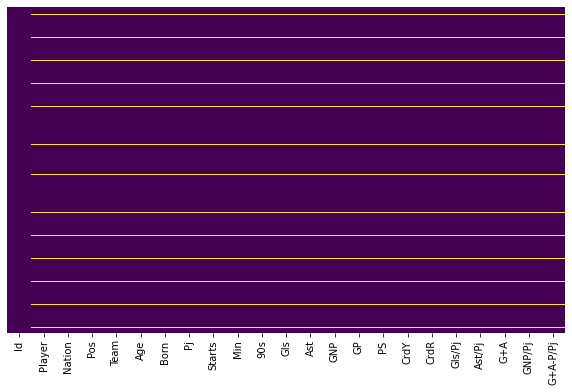

In [35]:
fn.check_nan(player)

In [36]:
player.dropna(inplace = True)
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-040,1991.0,10.0,7.0,551,6.1,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-220,1996.0,13.0,8.0,747,8.3,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-069,1995.0,14.0,14.0,"1,260",14.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-356,1997.0,14.0,14.0,"1,260",14.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-352,1997.0,6.0,2.0,238,2.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00


'N nan cols: 0'

Series([], dtype: float64)

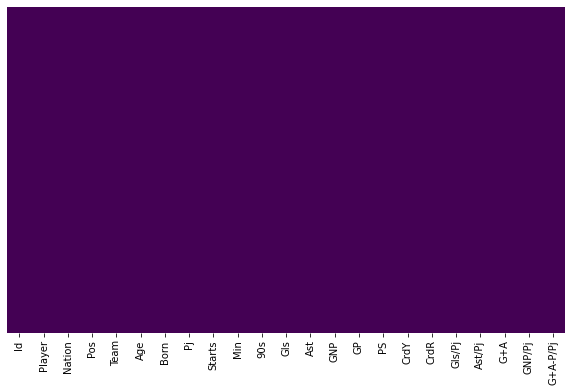

In [37]:
fn.check_nan(player)

In [38]:
lista = []
for x in range(len(player)):
    lista.append(x)
player.Id = lista
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1103,1058,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-340,1994.0,17.0,13.0,"1,139",12.7,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.16,0.16,0.32,0.08,0.24
1104,1059,Luca Zidane,fr FRA,GK,Eibar,24-208,1998.0,7.0,7.0,630,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1105,1060,Elady Zorrilla,es ESP,FW,Tenerife,32-147,1990.0,5.0,1.0,190,2.1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.47,0.00,0.47,0.00,0.00
1106,1061,Loren Zúñiga,es ESP,FW,Málaga,19-323,2003.0,11.0,2.0,333,3.7,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1107,1062,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-280,1994.0,16.0,11.0,"1,013",11.3,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.18,0.09,0.27,0.18,0.27


In [39]:
player.reset_index(drop=True, inplace=True)
player.tail()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
1058,1058,Ekain Zenitagoia,es ESP,FW,UD Ibiza,28-340,1994.0,17.0,13.0,"1,139",12.7,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.16,0.16,0.32,0.08,0.24
1059,1059,Luca Zidane,fr FRA,GK,Eibar,24-208,1998.0,7.0,7.0,630,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1060,1060,Elady Zorrilla,es ESP,FW,Tenerife,32-147,1990.0,5.0,1.0,190,2.1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.47,0.00,0.47,0.00,0.00
1061,1061,Loren Zúñiga,es ESP,FW,Málaga,19-323,2003.0,11.0,2.0,333,3.7,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00
1062,1062,Uroš Đurđević,me MNE,FW,Sporting Gijón,28-280,1994.0,16.0,11.0,"1,013",11.3,2.0,1.0,2.0,0.0,0.0,2.0,0.0,0.18,0.09,0.27,0.18,0.27


In [40]:
player.info(memory_usage='deep') # Pj, Starts, Born, Gls, Ast, GNP, GP, PS, CrdY, CrdR sin floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1063 non-null   int64  
 1   Player    1063 non-null   object 
 2   Nation    1063 non-null   object 
 3   Pos       1063 non-null   object 
 4   Team      1063 non-null   object 
 5   Age       1063 non-null   object 
 6   Born      1063 non-null   float64
 7   Pj        1063 non-null   float64
 8   Starts    1063 non-null   float64
 9   Min       1063 non-null   object 
 10  90s       1063 non-null   float64
 11  Gls       1063 non-null   float64
 12  Ast       1063 non-null   float64
 13  GNP       1063 non-null   float64
 14  GP        1063 non-null   float64
 15  PS        1063 non-null   float64
 16  CrdY      1063 non-null   float64
 17  CrdR      1063 non-null   float64
 18  Gls/Pj    1063 non-null   float64
 19  Ast/Pj    1063 non-null   float64
 20  G+A       1063 non-null   floa

In [41]:
lista = ['Pj', 'Starts', 'Born', 'Gls', 'Ast', 'GNP', 'GP', 'PS', 'CrdY', 'CrdR']
for x in lista:
    temp = []
    for i in player[x]:
        i = int(i)
        temp.append(i)
    player[x] = temp
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-040,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-220,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-069,1995,14,14,"1,260",14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-356,1997,14,14,"1,260",14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-352,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00


In [42]:
lista= []
for x in player.Min:
    x = x.replace(',', '')
    x = int(x)
    lista.append(x)
player.Min = lista
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj
0,0,Marcos Acuña,ar ARG,DF,Sevilla,31-040,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00
1,1,Álvaro Aguado,es ESP,MF,Valladolid,26-220,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24
2,2,Joseph Aidoo,gh GHA,DF,Celta Vigo,27-069,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07
3,3,Sergio Akieme,es ESP,DF,Almería,24-356,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00
4,4,Paul Akouokou,ci CIV,MF,Betis,24-352,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00


In [43]:
player.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1063 non-null   int64  
 1   Player    1063 non-null   object 
 2   Nation    1063 non-null   object 
 3   Pos       1063 non-null   object 
 4   Team      1063 non-null   object 
 5   Age       1063 non-null   object 
 6   Born      1063 non-null   int64  
 7   Pj        1063 non-null   int64  
 8   Starts    1063 non-null   int64  
 9   Min       1063 non-null   int64  
 10  90s       1063 non-null   float64
 11  Gls       1063 non-null   int64  
 12  Ast       1063 non-null   int64  
 13  GNP       1063 non-null   int64  
 14  GP        1063 non-null   int64  
 15  PS        1063 non-null   int64  
 16  CrdY      1063 non-null   int64  
 17  CrdR      1063 non-null   int64  
 18  Gls/Pj    1063 non-null   float64
 19  Ast/Pj    1063 non-null   float64
 20  G+A       1063 non-null   floa

In [44]:
player.Team.unique()

array(['Sevilla', 'Valladolid', 'Celta Vigo', 'Almería', 'Betis',
       'Real Madrid', 'Cádiz', 'Barcelona', 'Villarreal', 'Getafe',
       'Elche', 'Real Sociedad', 'Valencia', 'Athletic Club', 'Mallorca',
       'Osasuna', 'Rayo Vallecano', 'Espanyol', 'Atlético Madrid',
       'Girona', 'Málaga', 'Ponferradina', 'Oviedo', 'Alavés', 'Andorra',
       'Racing Sant', 'Eibar', 'Lugo', 'Cartagena', 'Tenerife',
       'Albacete', 'Zaragoza', 'Villarreal B', 'Las Palmas', 'Burgos',
       'Huesca', 'Sporting Gijón', 'Granada', 'UD Ibiza', 'Leganés',
       'CD Mirandés', 'Levante'], dtype=object)

In [45]:
lista = []
for x in player.Team:
    x = x.replace('á','a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    lista.append(x)
player.Team = lista
player.Team.unique()

array(['Sevilla', 'Valladolid', 'Celta Vigo', 'Almeria', 'Betis',
       'Real Madrid', 'Cadiz', 'Barcelona', 'Villarreal', 'Getafe',
       'Elche', 'Real Sociedad', 'Valencia', 'Athletic Club', 'Mallorca',
       'Osasuna', 'Rayo Vallecano', 'Espanyol', 'Atletico Madrid',
       'Girona', 'Malaga', 'Ponferradina', 'Oviedo', 'Alaves', 'Andorra',
       'Racing Sant', 'Eibar', 'Lugo', 'Cartagena', 'Tenerife',
       'Albacete', 'Zaragoza', 'Villarreal B', 'Las Palmas', 'Burgos',
       'Huesca', 'Sporting Gijon', 'Granada', 'UD Ibiza', 'Leganes',
       'CD Mirandes', 'Levante'], dtype=object)

In [46]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in player.Team.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [47]:
lista = []
for x in player.Nation:
    x = x.split(' ')
    lista.append(x[1])
player.Nation = lista
player.Nation.unique()

array(['ARG', 'ESP', 'GHA', 'CIV', 'AUT', 'CHI', 'PAR', 'FRA', 'POR',
       'URU', 'SEN', 'MAR', 'GAB', 'SRB', 'ALB', 'BRA', 'CPV', 'MLI',
       'COD', 'DEN', 'CRO', 'BEL', 'NGA', 'SUI', 'MEX', 'GUI', 'MKD',
       'TOG', 'COL', 'ITA', 'NED', 'EQG', 'VEN', 'SWE', 'KOR', 'CAN',
       'CTA', 'GER', 'JPN', 'USA', 'POL', 'HON', 'UKR', 'AUS', 'MTQ',
       'GEO', 'MOZ', 'ALG', 'DOM', 'KVX', 'SVN', 'TUR', 'ECU', 'MNE',
       'NOR', 'PER', 'SVK', 'ISR', 'IRN', 'GRE', 'AND', 'ROU', 'ENG',
       'SLE', 'GNB', 'BOL', 'CMR', 'MTN', 'RUS', 'GAM', 'BHU'],
      dtype=object)

In [48]:
lista = []
for x in player.Age:
    x = x.split('-')
    lista.append(x[0])
player.Age = lista
player.Age.unique()

array(['31', '26', '27', '24', '30', '23', '33', '37', '25', '20', '18',
       '22', '28', '19', '35', '21', '34', '32', '17', '39', '29', '36',
       '41', '38', '40'], dtype=object)

In [49]:
lista = []
for x in player.Team:
    for pos, i in enumerate(team.Team):
        if x == i:
            lista.append(pos)
        else:
            continue
player["Id_Team"] = lista
player.head()

,Id,Player,Nation,Pos,Team,Age,Born,Pj,Starts,Min,90s,Gls,Ast,GNP,GP,PS,CrdY,CrdR,Gls/Pj,Ast/Pj,G+A,GNP/Pj,G+A-P/Pj,Id_Team
0,0,Marcos Acuña,ARG,DF,Sevilla,31,1991,10,7,551,6.1,0,0,0,0,0,4,1,0.00,0.00,0.00,0.00,0.00,16
1,1,Álvaro Aguado,ESP,MF,Valladolid,26,1996,13,8,747,8.3,0,2,0,0,0,1,0,0.00,0.24,0.24,0.00,0.24,18
2,2,Joseph Aidoo,GHA,DF,Celta Vigo,27,1995,14,14,1260,14.0,1,0,1,0,0,2,0,0.07,0.00,0.07,0.07,0.07,6
3,3,Sergio Akieme,ESP,DF,Almeria,24,1997,14,14,1260,14.0,0,0,0,0,0,3,0,0.00,0.00,0.00,0.00,0.00,0
4,4,Paul Akouokou,CIV,MF,Betis,24,1997,6,2,238,2.6,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,4


### LIMPIAMOS MATCHES

In [50]:
match.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Season,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,0,SP1,12/08/2022,20:00,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40,3.20,3.05,2.45,3.38,3.10,2.48,3.20,3.0,2.40,3.25,3.10,2.40,3.41,3.24,2.49,3.28,3.08,2.43,2.62,1.50,2.55,1.57,2.62,1.60,2.50,1.54,0.25,1.83,2.07,1.85,2.09,1.87,2.09,1.82,2.04,3.10,3.1,2.55,3.10,2.95,2.50,3.15,3.05,2.45,3.19,3.06,2.63,3.25,2.90,2.45,3.10,3.0,2.55,3.52,3.14,2.66,3.20,3.04,2.50,2.62,1.50,2.63,1.54,2.69,1.57,2.55,1.52,0.25,1.73,2.08,1.76,2.20,1.88,2.23,1.79,2.09,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SP1,13/08/2022,16:00,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33,1.83,3.55,4.60,1.81,3.75,4.87,1.83,3.5,4.33,1.75,3.50,4.50,1.90,3.77,4.90,1.83,3.68,4.50,2.00,1.80,2.10,1.81,2.13,1.87,2.04,1.80,-0.50,1.77,2.02,1.80,2.13,1.86,2.13,1.81,2.05,1.72,3.6,4.75,1.75,3.50,5.00,1.77,3.50,5.00,1.78,3.62,5.39,1.75,3.50,5.00,1.75,3.6,5.00,1.84,3.73,5.39,1.78,3.58,5.00,2.20,1.66,2.24,1.71,2.26,1.83,2.19,1.70,-0.75,2.00,1.90,2.02,1.91,2.06,1.93,2.01,1.86,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SP1,13/08/2022,18:00,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95,3.85,3.60,1.95,4.05,3.78,1.95,3.90,3.5,1.95,3.80,3.50,1.90,4.10,3.80,2.00,3.93,3.66,1.94,1.99,1.91,2.00,1.91,2.00,1.92,1.95,1.87,0.50,1.95,1.95,1.97,1.95,1.97,1.98,1.93,1.93,3.30,3.4,2.20,4.00,3.40,1.95,3.35,3.35,2.20,3.54,3.44,2.23,3.50,3.25,2.15,3.40,3.4,2.20,3.66,3.47,2.25,3.45,3.39,2.19,2.00,1.80,2.09,1.81,2.14,1.90,2.05,1.79,0.25,2.02,1.88,2.02,1.91,2.03,1.91,1.98,1.88,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SP1,13/08/2022,20:00,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50,1.22,6.75,13.00,1.22,6.83,15.00,1.18,6.5,17.00,1.18,6.50,13.00,1.24,7.40,17.00,1.21,6.79,14.20,1.53,2.50,1.55,2.57,1.55,2.73,1.50,2.58,-2.00,2.09,1.81,2.15,1.78,2.16,1.88,2.04,1.83,1.22,6.5,12.00,1.25,6.25,11.00,1.22,6.50,12.00,1.24,6.80,13.50,1.20,6.50,15.00,1.20,7.0,13.00,1.25,7.40,16.75,1.22,6.82,13.42,1.50,2.62,1.51,2.68,1.58,2.79,1.50,2.61,-1.75,1.82,2.08,1.83,2.08,1.86,2.14,1.82,2.06,2223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SP1,14/08/2022,16:30,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20,3.45,3.20,2.20,3.62,3.29,2.26,3.40,3.2,2.20,3.50,3.13,2.15,3.75,3.33,2.26,3.55,3.24,2.20,2.37,1.57,2.50,1.59,2.50,1.65,2.38,1.59,0.25,1.99,1.91,2.00,1.93,2.05,1.93,1.98,1.87,3.80,3.0,2.15,3.70,3.00,2.20,3.65,3.05,2.25,4.03,3.08,2.22,3.90,3.00,2.15,3.75,3.1,2.20,4.05,3.18,2.25,3.80,3.07,2.20,2.62,1.50,2.74,1.51,2.75,1.55,2.

'N nan cols: 141'

Div              0.020455
Date             0.020455
Time            80.396836
HomeTeam         0.020455
AwayTeam         0.020455
                  ...    
SBD             60.009546
SBA             60.009546
Unnamed: 58    100.000000
Unnamed: 59    100.000000
Unnamed: 60    100.000000
Length: 141, dtype: float64

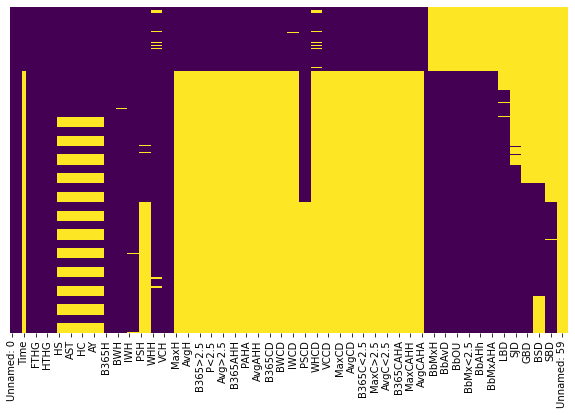

In [51]:
fn.check_nan(match)


'N nan cols: 138'

Div          0.020455
Date         0.020455
Time        80.396836
HomeTeam     0.020455
AwayTeam     0.020455
              ...    
BSD         65.593891
BSA         65.593891
SBH         60.009546
SBD         60.009546
SBA         60.009546
Length: 138, dtype: float64

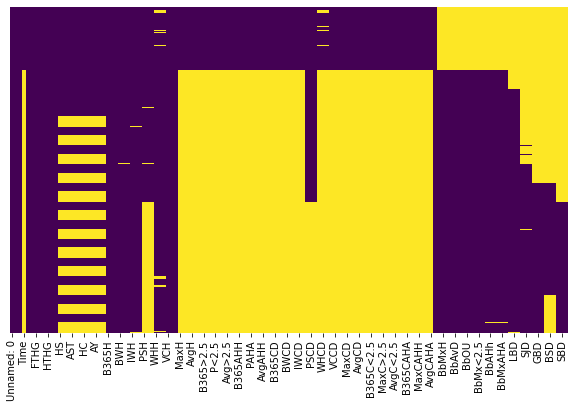

In [52]:
match.drop(['Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60'], axis=1, inplace = True)
fn.check_nan(match)

'N nan cols: 61'

Div          0.020455
Date         0.020455
HomeTeam     0.020455
AwayTeam     0.020455
FTHG         0.020455
              ...    
BSD         65.593891
BSA         65.593891
SBH         60.009546
SBD         60.009546
SBA         60.009546
Length: 61, dtype: float64

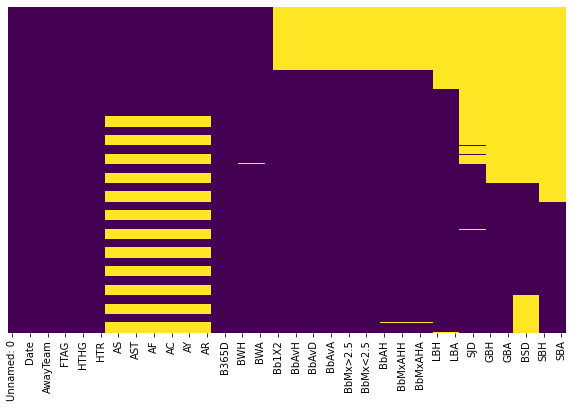

In [53]:
match.drop(['Time','IWH','IWD','IWA', 'PSH', 'PSD', 'PSA', 'WHH','WHD','WHA','VCH','VCD',
            'VCA', 'MaxH','MaxD','MaxA','AvgH','AvgD','AvgA', 'B365>2.5','B365<2.5', 
            'P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','AHh','B365AHH','B365AHA',
            'PAHH','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA','B365CH','B365CD','B365CA', 
            'BWCH','BWCD','BWCA','IWCH','IWCD','IWCA','PSCH','PSCD','PSCA','WHCH','WHCD',
            'WHCA','VCCH','VCCD','VCCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA',
            'B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5',
            'AvgC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA',
            'AvgCAHH','AvgCAHA'], axis=1, inplace = True)
fn.check_nan(match)

In [54]:
match.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
14661,14661,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.75,3.75,1.85,2.85,4.35,56,22.0,2.10,2.03,2.92,2.78,4.00,3.71,5.0,1.98,1.97,1.86,1.86,6.0,-0.25,1.87,1.85,2.02,2.00,NaN,NaN,NaN,2.00,2.62,4.00,2.05,2.80,3.55,NaN,NaN,NaN,2.10,2.80,3.60
14662,14662,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.10,2.75,3.50,2.00,2.70,4.00,56,22.0,2.10,2.05,2.90,2.77,4.25,3.70,6.0,1.91,1.88,1.95,1.94,6.0,-0.25,1.81,1.80,2.05,2.05,NaN,NaN,NaN,2.10,2.75,3.50,2.05,2.75,3.60,NaN,NaN,NaN,2.10,2.80,3.60
14663,14663,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.87,3.60,1.95,2.85,3.85,56,22.0,2.00,1.95,3.10,2.87,4.33,3.88,5.0,1.91,1.88,1.95,1.94,6.0,-0.5,2.09,2.06,1.84,1.81,NaN,NaN,NaN,1.91,2.75,4.33,1.95,2.85,3.80,NaN,NaN,NaN,2.00,2.88,3.75
14664,14664,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.61,3.25,5.00,1.65,3.30,4.65,56,22.0,1.68,1.61,3.50,3.31,6.00,5.16,8.0,1.97,1.90,1.95,1.92,6.0,-0.75,1.77,1.77,2.11,2.09,NaN,NaN,NaN,1.50,3.50,6.00,1.60,3.30,5.00,NaN,NaN,NaN,1.62,3.20,5.50
14665,14665,SP2,18/06/06,Hercules,Recreativo,0.0,2.0,A,0.0,2.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.75,2.75,2.50,2.85,2.70,2.50,56,20.0,3.00,2.81,3.00,2.78,2.60,2.47,5.0,1.85,1.84,2.00,1.99,4.0,0.0,2.10,2.09,1.78,1.76,NaN,NaN,NaN,2.75,3.00,2.38,2.80,2.75,2.45,NaN,NaN,NaN,3.00,2.75,2.40


'N nan cols: 7'

Bb1X2    19.834992
BbMxH    19.834992
BbAvH    19.834992
BbMxD    19.834992
BbAvD    19.834992
BbMxA    19.834992
BbAvA    19.834992
dtype: float64

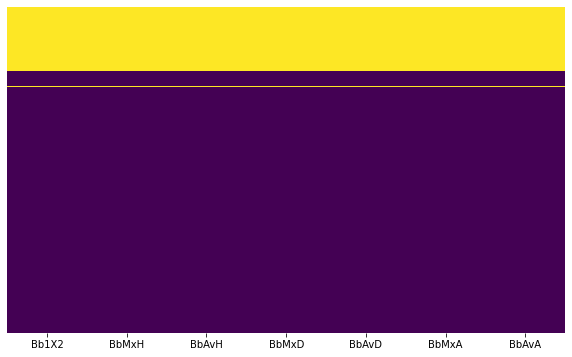

In [55]:
fn.check_nan(match[['Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA']])

'N nan cols: 28'

Div          0.020455
Date         0.020455
HomeTeam     0.020455
AwayTeam     0.020455
FTHG         0.020455
FTAG         0.020455
FTR          0.020455
HTHG         0.163644
HTAG         0.163644
HTR          0.163644
HS          37.965362
AS          37.965362
HST         37.965362
AST         37.965362
HF          37.965362
AF          37.965362
HC          37.965362
AC          37.965362
HY          37.965362
AY          37.965362
HR          37.965362
AR          37.965362
B365H        0.279558
B365D        0.279558
B365A        0.279558
BWH          0.477294
BWD          0.477294
BWA          0.477294
dtype: float64

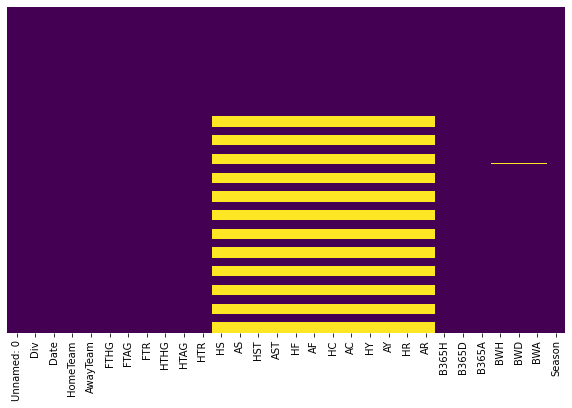

In [56]:
match.drop(['SBH','SBD','SBA','LBH','LBD','LBA','BSH','BSD','BSA','SJH','SJD','SJA',
            'GBH','GBD','GBA','BbAH','BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA',
            'BbMx>2.5','BbAv>2.5','BbMx<2.5','BbAv<2.5','BbOU','Bb1X2','BbMxH','BbAvH',
            'BbMxD','BbAvD','BbMxA','BbAvA'], axis=1, inplace = True)
fn.check_nan(match)

In [57]:
match.isnull().sum()

Unnamed: 0       0
Div              3
Date             3
HomeTeam         3
AwayTeam         3
FTHG             3
FTAG             3
FTR              3
HTHG            24
HTAG            24
HTR             24
HS            5568
AS            5568
HST           5568
AST           5568
HF            5568
AF            5568
HC            5568
AC            5568
HY            5568
AY            5568
HR            5568
AR            5568
B365H           41
B365D           41
B365A           41
BWH             70
BWD             70
BWA             70
Season           0
dtype: int64

In [58]:
round(match['AR'].mean())

0

In [59]:
match['HS'].fillna(round(match['HS'].mean()), inplace=True)
match['AS'].fillna(round(match['AS'].mean()), inplace=True)
match['HST'].fillna(round(match['HST'].mean()), inplace=True)
match['AST'].fillna(round(match['AST'].mean()), inplace=True)
match['HF'].fillna(round(match['HF'].mean()), inplace=True)
match['AF'].fillna(round(match['AF'].mean()), inplace=True)
match['HC'].fillna(round(match['HC'].mean()), inplace=True)
match['AC'].fillna(round(match['AC'].mean()), inplace=True)
match['HY'].fillna(round(match['HY'].mean()), inplace=True)
match['AY'].fillna(round(match['AY'].mean()), inplace=True)
match['HR'].fillna(round(match['HR'].mean()), inplace=True)
match['AR'].fillna(round(match['AR'].mean()), inplace=True)
match.isnull().sum()

Unnamed: 0     0
Div            3
Date           3
HomeTeam       3
AwayTeam       3
FTHG           3
FTAG           3
FTR            3
HTHG          24
HTAG          24
HTR           24
HS             0
AS             0
HST            0
AST            0
HF             0
AF             0
HC             0
AC             0
HY             0
AY             0
HR             0
AR             0
B365H         41
B365D         41
B365A         41
BWH           70
BWD           70
BWA           70
Season         0
dtype: int64

In [60]:
for pos, x in enumerate(match['Div'].isnull()):
    #print(pos,x)
    if x == True:
        print(pos,x)
    else:
        continue

7927 True
8770 True
8771 True


In [61]:
match.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'Season'],
      dtype='object')

In [62]:
match[['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA']]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA
0,0,SP1,12/08/2022,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40
1,1,SP1,13/08/2022,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33
2,2,SP1,13/08/2022,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95
3,3,SP1,13/08/2022,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50
4,4,SP1,14/08/2022,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14661,14661,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.75,3.75,1.85,2.85,4.35
14662,14662,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.10,2.75,3.50,2.00,2.70,4.00
14663,14663,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.87,3.60,1.95,2.85,3.85
14664,14664,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,1.61,3.25,5.00,1.65,3.30,4.65


In [63]:
match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2']

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
7927,7927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1314
8770,8770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1213
8771,8771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1213


In [64]:
n = list(match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2'].index)
n

[7927, 8770, 8771]

In [65]:
match.drop(index=n, inplace = True)
match.loc[match['Div'] != 'SP1'].loc[match['Div'] != 'SP2']

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season


'N nan cols: 9'

HTHG     0.143218
HTAG     0.143218
HTR      0.143218
B365H    0.259156
B365D    0.259156
B365A    0.259156
BWH      0.456932
BWD      0.456932
BWA      0.456932
dtype: float64

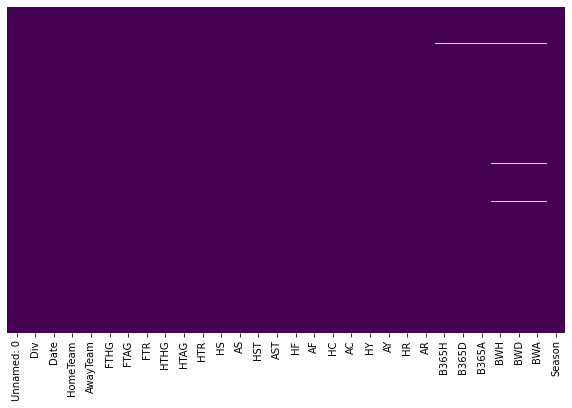

In [66]:
fn.check_nan(match)

In [67]:
nulos = []
for pos, x in enumerate(match['HTHG'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[3490,
 3503,
 3517,
 3522,
 3540,
 3548,
 3560,
 3570,
 3583,
 3590,
 3605,
 3616,
 3627,
 3630,
 3649,
 3651,
 3663,
 3682,
 3692,
 3698,
 3711]

In [68]:
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
3490,3490,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3503,3503,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3517,3517,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3522,3522,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3540,3540,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3548,3548,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3560,3560,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3570,3570,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3583,3583,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3590,3590,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,NaN,NaN,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819


In [69]:
match[['HTHG','HTAG']] = match[['HTHG','HTAG']].fillna(0.0)
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
3490,3490,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3503,3503,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3517,3517,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3522,3522,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3540,3540,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3548,3548,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3560,3560,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3570,3570,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3583,3583,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3590,3590,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,0.0,0.0,NaN,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819


In [70]:
match['HTR'] = match['HTR'].fillna('D')
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
3490,3490,SP2,19/01/2019,Reus Deportiu,Las Palmas,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3503,3503,SP2,27/01/2019,Albacete,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3517,3517,SP2,03/02/2019,Reus Deportiu,Elche,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3522,3522,SP2,09/02/2019,Gimnastic,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3540,3540,SP2,17/02/2019,Reus Deportiu,Almeria,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3548,3548,SP2,24/02/2019,Granada,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3560,3560,SP2,03/03/2019,Reus Deportiu,Tenerife,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3570,3570,SP2,10/03/2019,Lugo,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3583,3583,SP2,17/03/2019,Reus Deportiu,La Coruna,0.0,1.0,A,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819
3590,3590,SP2,24/03/2019,Extremadura UD,Reus Deportiu,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1819


'N nan cols: 6'

B365H    0.259156
B365D    0.259156
B365A    0.259156
BWH      0.456932
BWD      0.456932
BWA      0.456932
dtype: float64

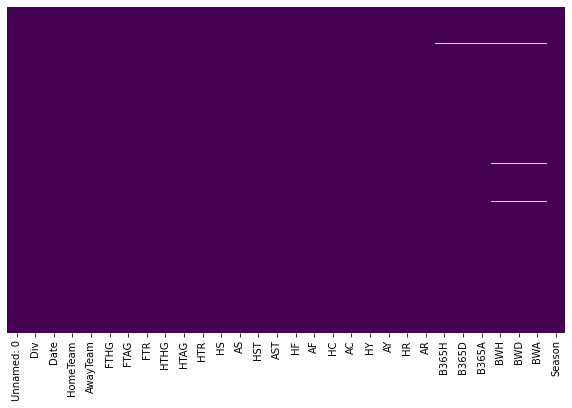

In [71]:
fn.check_nan(match)

In [72]:
nulos = []
for pos, x in enumerate(match['B365H'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[964,
 1058,
 1662,
 1710,
 1740,
 1741,
 1742,
 1743,
 1757,
 1925,
 2488,
 2845,
 3490,
 3503,
 3517,
 3522,
 3540,
 3548,
 3560,
 3570,
 3583,
 3590,
 3605,
 3616,
 3627,
 3630,
 3649,
 3651,
 3663,
 3682,
 3692,
 3698,
 3711,
 4110,
 8418,
 9462,
 9604,
 10433]

In [73]:
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
964,964,SP2,02/01/2022,Sp Gijon,Lugo,1.0,1.0,D,0.0,1.0,A,21.0,18.0,4.0,4.0,12.0,15.0,3.0,5.0,1.0,3.0,0.0,1.0,NaN,NaN,NaN,1.83,3.10,4.10,2122
1058,1058,SP2,07/03/2022,Sociedad B,Sp Gijon,2.0,1.0,H,1.0,0.0,H,15.0,12.0,5.0,2.0,7.0,17.0,6.0,3.0,3.0,4.0,0.0,0.0,NaN,NaN,NaN,2.60,2.85,2.70,2122
1662,1662,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021
1710,1710,SP2,23/11/2020,Albacete,Almeria,1.0,2.0,A,0.0,1.0,A,14.0,11.0,3.0,5.0,21.0,21.0,6.0,5.0,4.0,7.0,0.0,0.0,NaN,NaN,NaN,3.00,2.80,2.65,2021
1740,1740,SP2,03/12/2020,Almeria,Mallorca,0.0,1.0,A,0.0,0.0,D,10.0,12.0,2.0,3.0,11.0,18.0,4.0,5.0,4.0,3.0,0.0,0.0,NaN,NaN,NaN,2.60,2.95,2.85,2021
1741,1741,SP2,03/12/2020,Oviedo,Alcorcon,1.0,1.0,D,0.0,0.0,D,10.0,12.0,4.0,6.0,11.0,12.0,4.0,4.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,2.10,2.90,4.00,2021
1742,1742,SP2,03/12/2020,Tenerife,Sabadell,1.0,2.0,A,1.0,2.0,A,15.0,5.0,3.0,2.0,15.0,18.0,4.0,4.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,1.67,3.60,5.25,2021
1743,1743,SP2,03/12/2020,Sp Gijon,Albacete,0.0,0.0,D,0.0,0.0,D,15.0,5.0,5.0,1.0,15.0,20.0,4.0,2.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,1.80,3.00,5.50,2021
1757,1757,SP2,10/12/2020,Girona,Logrones,2.0,0.0,H,0.0,0.0,D,15.0,14.0,4.0,3.0,17.0,13.0,3.0,4.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,1.67,3.50,5.25,2021
1925,1925,SP2,04/04/2021,Sp Gijon,Mirandes,1.0,2.0,A,0.0,0.0,D,13.0,10.0,2.0,7.0,13.0,14.0,9.0,4.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,1.67,3.30,6.00,2021


In [74]:
match['B365H'] = match['B365H'].fillna(2.20)
match['B365D'] = match['B365D'].fillna(3.10)
match['B365A'] = match['B365A'].fillna(3.30)
match.iloc[nulos]

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
964,964,SP2,02/01/2022,Sp Gijon,Lugo,1.0,1.0,D,0.0,1.0,A,21.0,18.0,4.0,4.0,12.0,15.0,3.0,5.0,1.0,3.0,0.0,1.0,2.2,3.1,3.3,1.83,3.10,4.10,2122
1058,1058,SP2,07/03/2022,Sociedad B,Sp Gijon,2.0,1.0,H,1.0,0.0,H,15.0,12.0,5.0,2.0,7.0,17.0,6.0,3.0,3.0,4.0,0.0,0.0,2.2,3.1,3.3,2.60,2.85,2.70,2122
1662,1662,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,2.2,3.1,3.3,NaN,NaN,NaN,2021
1710,1710,SP2,23/11/2020,Albacete,Almeria,1.0,2.0,A,0.0,1.0,A,14.0,11.0,3.0,5.0,21.0,21.0,6.0,5.0,4.0,7.0,0.0,0.0,2.2,3.1,3.3,3.00,2.80,2.65,2021
1740,1740,SP2,03/12/2020,Almeria,Mallorca,0.0,1.0,A,0.0,0.0,D,10.0,12.0,2.0,3.0,11.0,18.0,4.0,5.0,4.0,3.0,0.0,0.0,2.2,3.1,3.3,2.60,2.95,2.85,2021
1741,1741,SP2,03/12/2020,Oviedo,Alcorcon,1.0,1.0,D,0.0,0.0,D,10.0,12.0,4.0,6.0,11.0,12.0,4.0,4.0,5.0,1.0,0.0,0.0,2.2,3.1,3.3,2.10,2.90,4.00,2021
1742,1742,SP2,03/12/2020,Tenerife,Sabadell,1.0,2.0,A,1.0,2.0,A,15.0,5.0,3.0,2.0,15.0,18.0,4.0,4.0,5.0,1.0,0.0,0.0,2.2,3.1,3.3,1.67,3.60,5.25,2021
1743,1743,SP2,03/12/2020,Sp Gijon,Albacete,0.0,0.0,D,0.0,0.0,D,15.0,5.0,5.0,1.0,15.0,20.0,4.0,2.0,0.0,4.0,0.0,0.0,2.2,3.1,3.3,1.80,3.00,5.50,2021
1757,1757,SP2,10/12/2020,Girona,Logrones,2.0,0.0,H,0.0,0.0,D,15.0,14.0,4.0,3.0,17.0,13.0,3.0,4.0,3.0,1.0,0.0,0.0,2.2,3.1,3.3,1.67,3.50,5.25,2021
1925,1925,SP2,04/04/2021,Sp Gijon,Mirandes,1.0,2.0,A,0.0,0.0,D,13.0,10.0,2.0,7.0,13.0,14.0,9.0,4.0,2.0,2.0,0.0,0.0,2.2,3.1,3.3,1.67,3.30,6.00,2021


In [75]:
nulos = []
for pos, x in enumerate(match['BWH'].isnull()):
    #print(pos,x)
    if x == True:
        #print(pos,x)
        nulos.append(pos)
    else:
        continue
nulos

[855,
 862,
 882,
 892,
 1662,
 2487,
 2488,
 2845,
 2854,
 2860,
 3490,
 3503,
 3517,
 3522,
 3540,
 3548,
 3560,
 3570,
 3579,
 3583,
 3590,
 3605,
 3616,
 3627,
 3630,
 3649,
 3651,
 3663,
 3682,
 3692,
 3698,
 3707,
 3711,
 4200,
 4201,
 4202,
 4203,
 4204,
 4205,
 4549,
 4554,
 4555,
 4557,
 6234,
 6631,
 7023,
 7027,
 7057,
 7058,
 7060,
 7063,
 7067,
 7068,
 7071,
 7072,
 7073,
 7074,
 7083,
 7921,
 8669,
 8752,
 8764,
 8765,
 9604,
 13435,
 13598,
 13721]

In [76]:
match.iloc[nulos].head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
855,855,SP2,24/10/2021,Amorebieta,Sociedad B,1.0,2.0,A,0.0,1.0,A,12.0,11.0,3.0,4.0,10.0,10.0,6.0,4.0,1.0,2.0,0.0,0.0,2.60,3.0,2.90,NaN,NaN,NaN,2122
862,862,SP2,29/10/2021,Sociedad B,Las Palmas,0.0,1.0,A,0.0,1.0,A,9.0,6.0,0.0,2.0,18.0,9.0,8.0,6.0,1.0,1.0,0.0,0.0,2.60,3.1,2.87,NaN,NaN,NaN,2122
882,882,SP2,04/11/2021,Malaga,Sociedad B,2.0,1.0,H,2.0,1.0,H,8.0,13.0,4.0,2.0,19.0,6.0,4.0,4.0,1.0,2.0,0.0,0.0,1.72,3.4,5.25,NaN,NaN,NaN,2122
892,892,SP2,07/11/2021,Sociedad B,Ibiza,0.0,1.0,A,0.0,0.0,D,6.0,9.0,1.0,5.0,11.0,16.0,3.0,3.0,2.0,0.0,0.0,1.0,2.62,3.1,2.90,NaN,NaN,NaN,2122
1662,1662,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,2.20,3.1,3.30,NaN,NaN,NaN,2021


In [77]:
match['BWH'] = match['BWH'].fillna(2.20)
match['BWD'] = match['BWD'].fillna(3.10)
match['BWA'] = match['BWA'].fillna(3.30)
match.iloc[nulos].head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
855,855,SP2,24/10/2021,Amorebieta,Sociedad B,1.0,2.0,A,0.0,1.0,A,12.0,11.0,3.0,4.0,10.0,10.0,6.0,4.0,1.0,2.0,0.0,0.0,2.60,3.0,2.90,2.2,3.1,3.3,2122
862,862,SP2,29/10/2021,Sociedad B,Las Palmas,0.0,1.0,A,0.0,1.0,A,9.0,6.0,0.0,2.0,18.0,9.0,8.0,6.0,1.0,1.0,0.0,0.0,2.60,3.1,2.87,2.2,3.1,3.3,2122
882,882,SP2,04/11/2021,Malaga,Sociedad B,2.0,1.0,H,2.0,1.0,H,8.0,13.0,4.0,2.0,19.0,6.0,4.0,4.0,1.0,2.0,0.0,0.0,1.72,3.4,5.25,2.2,3.1,3.3,2122
892,892,SP2,07/11/2021,Sociedad B,Ibiza,0.0,1.0,A,0.0,0.0,D,6.0,9.0,1.0,5.0,11.0,16.0,3.0,3.0,2.0,0.0,0.0,1.0,2.62,3.1,2.90,2.2,3.1,3.3,2122
1662,1662,SP2,29/10/2020,Sabadell,Leganes,1.0,0.0,H,0.0,0.0,D,8.0,12.0,4.0,3.0,15.0,10.0,3.0,6.0,3.0,5.0,0.0,0.0,2.20,3.1,3.30,2.2,3.1,3.3,2021


'N nan cols: 0'

Series([], dtype: float64)

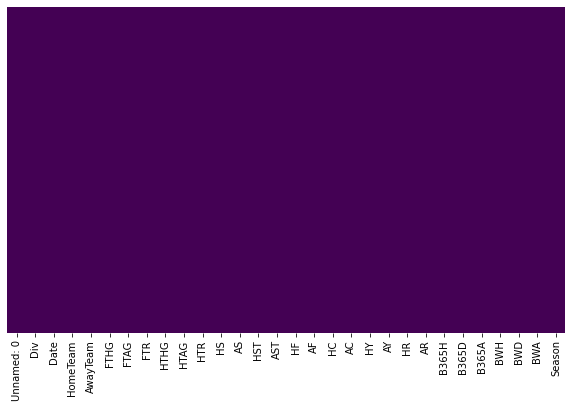

In [78]:
fn.check_nan(match)

In [79]:
match.tail()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14661,14661,SP2,17/06/06,Sp Gijon,Murcia,1.0,0.0,H,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.75,3.75,1.85,2.85,4.35,56
14662,14662,SP2,17/06/06,Tenerife,Albacete,1.0,1.0,D,0.0,0.0,D,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.10,2.75,3.50,2.00,2.70,4.00,56
14663,14663,SP2,17/06/06,Valladolid,Elche,2.0,2.0,D,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.00,2.87,3.60,1.95,2.85,3.85,56
14664,14664,SP2,17/06/06,Xerez,Malaga B,4.0,2.0,H,4.0,1.0,H,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,1.61,3.25,5.00,1.65,3.30,4.65,56
14665,14665,SP2,18/06/06,Hercules,Recreativo,0.0,2.0,A,0.0,2.0,A,13.0,11.0,5.0,4.0,15.0,15.0,6.0,4.0,2.0,3.0,0.0,0.0,2.75,2.75,2.50,2.85,2.70,2.50,56


In [80]:
match.columns = ['Id', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'Season']
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,12/08/2022,Osasuna,Sevilla,2.0,1.0,H,1.0,1.0,D,12.0,10.0,5.0,3.0,16.0,9.0,5.0,2.0,5.0,3.0,0.0,0.0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,13/08/2022,Celta,Espanol,2.0,2.0,D,1.0,0.0,H,8.0,10.0,3.0,2.0,17.0,15.0,3.0,3.0,5.0,2.0,0.0,0.0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,13/08/2022,Valladolid,Villarreal,0.0,3.0,A,0.0,0.0,D,12.0,10.0,6.0,4.0,6.0,10.0,4.0,5.0,1.0,0.0,0.0,0.0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,13/08/2022,Barcelona,Vallecano,0.0,0.0,D,0.0,0.0,D,21.0,4.0,6.0,2.0,16.0,14.0,8.0,0.0,3.0,6.0,1.0,0.0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,14/08/2022,Cadiz,Sociedad,0.0,1.0,A,0.0,1.0,A,7.0,15.0,2.0,7.0,9.0,20.0,3.0,6.0,4.0,2.0,0.0,0.0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [81]:
lista = ['FTHG', 'FTAG','HTHG', 'HTAG','HS', 'AS', 'HST', 'AST', 'HF', 'AF','HC', 'AC', 'HY', 'AY', 'HR', 'AR']
for x in lista:
    temp = []
    for i in match[x]:
        i = int(i)
        temp.append(i)
    match[x] = temp
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,12/08/2022,Osasuna,Sevilla,2,1,H,1,1,D,12,10,5,3,16,9,5,2,5,3,0,0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,13/08/2022,Celta,Espanol,2,2,D,1,0,H,8,10,3,2,17,15,3,3,5,2,0,0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,13/08/2022,Valladolid,Villarreal,0,3,A,0,0,D,12,10,6,4,6,10,4,5,1,0,0,0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,13/08/2022,Barcelona,Vallecano,0,0,D,0,0,D,21,4,6,2,16,14,8,0,3,6,1,0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,14/08/2022,Cadiz,Sociedad,0,1,A,0,1,A,7,15,2,7,9,20,3,6,4,2,0,0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [82]:
match.HomeTeam.unique()

array(['Osasuna', 'Celta', 'Valladolid', 'Barcelona', 'Cadiz', 'Valencia',
       'Almeria', 'Ath Bilbao', 'Getafe', 'Betis', 'Espanol', 'Sevilla',
       'Mallorca', 'Ath Madrid', 'Sociedad', 'Elche', 'Girona',
       'Vallecano', 'Real Madrid', 'Villarreal', 'Levante', 'Eibar',
       'Mirandes', 'Leganes', 'Las Palmas', 'Santander', 'Ibiza',
       'Burgos', 'Oviedo', 'Lugo', 'Cartagena', 'Villarreal B', 'Alaves',
       'Sp Gijon', 'Albacete', 'Zaragoza', 'Granada', 'Huesca',
       'Tenerife', 'Ponferradina', 'Malaga', 'Andorra', 'Sociedad B',
       'Fuenlabrada', 'Alcorcon', 'Amorebieta', 'Castellon', 'Logrones',
       'Sabadell', 'La Coruna', 'Numancia', 'Extremadura UD', 'Cordoba',
       'Gimnastic', 'Reus Deportiu', 'Rayo Majadahonda', 'Lorca',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'UCAM Murcia', 'Llagostera',
       'Ath Bilbao B', 'Recreativo', 'Hercules', 'Jaen', 'Murcia',
       'Real Madrid B', 'Xerez', 'Guadalajara', 'Alcoyano', 'Salamanca',
       'Real Union

In [83]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.HomeTeam.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Atletico Madrid',
 'Celta Vigo',
 'Espanyol',
 'Rayo Vallecano',
 'Real Sociedad',
 'CD Mirandes',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza']

In [84]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.AwayTeam.unique():
        continue
    else:
        lista.append(x)
lista

['Athletic Club',
 'Atletico Madrid',
 'Celta Vigo',
 'Espanyol',
 'Rayo Vallecano',
 'Real Sociedad',
 'CD Mirandes',
 'Racing Sant',
 'Sporting Gijon',
 'UD Ibiza']

In [85]:
match.HomeTeam.unique()

array(['Osasuna', 'Celta', 'Valladolid', 'Barcelona', 'Cadiz', 'Valencia',
       'Almeria', 'Ath Bilbao', 'Getafe', 'Betis', 'Espanol', 'Sevilla',
       'Mallorca', 'Ath Madrid', 'Sociedad', 'Elche', 'Girona',
       'Vallecano', 'Real Madrid', 'Villarreal', 'Levante', 'Eibar',
       'Mirandes', 'Leganes', 'Las Palmas', 'Santander', 'Ibiza',
       'Burgos', 'Oviedo', 'Lugo', 'Cartagena', 'Villarreal B', 'Alaves',
       'Sp Gijon', 'Albacete', 'Zaragoza', 'Granada', 'Huesca',
       'Tenerife', 'Ponferradina', 'Malaga', 'Andorra', 'Sociedad B',
       'Fuenlabrada', 'Alcorcon', 'Amorebieta', 'Castellon', 'Logrones',
       'Sabadell', 'La Coruna', 'Numancia', 'Extremadura UD', 'Cordoba',
       'Gimnastic', 'Reus Deportiu', 'Rayo Majadahonda', 'Lorca',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'UCAM Murcia', 'Llagostera',
       'Ath Bilbao B', 'Recreativo', 'Hercules', 'Jaen', 'Murcia',
       'Real Madrid B', 'Xerez', 'Guadalajara', 'Alcoyano', 'Salamanca',
       'Real Union

In [86]:
lista = []
for x in match.HomeTeam:
    x = x.replace('Ath Bilbao','Athletic Club').replace('Ath Madrid', 'Atletico Madrid').replace('Celta', 'Celta Vigo')
    x = x.replace('Espanol', 'Espanyol').replace('Vallecano', 'Rayo Vallecano').replace('Sociedad', 'Real Sociedad')
    x = x.replace('Mirandes', 'CD Mirandes').replace('Santander', 'Racing Sant').replace('Sp Gijon', 'Sporting Gijon')
    x = x.replace('Ibiza', 'UD Ibiza')
    lista.append(x)
match.HomeTeam = lista
match.HomeTeam.unique()

array(['Osasuna', 'Celta Vigo', 'Valladolid', 'Barcelona', 'Cadiz',
       'Valencia', 'Almeria', 'Athletic Club', 'Getafe', 'Betis',
       'Espanyol', 'Sevilla', 'Mallorca', 'Atletico Madrid',
       'Real Sociedad', 'Elche', 'Girona', 'Rayo Vallecano',
       'Real Madrid', 'Villarreal', 'Levante', 'Eibar', 'CD Mirandes',
       'Leganes', 'Las Palmas', 'Racing Sant', 'UD Ibiza', 'Burgos',
       'Oviedo', 'Lugo', 'Cartagena', 'Villarreal B', 'Alaves',
       'Sporting Gijon', 'Albacete', 'Zaragoza', 'Granada', 'Huesca',
       'Tenerife', 'Ponferradina', 'Malaga', 'Andorra', 'Real Sociedad B',
       'Fuenlabrada', 'Alcorcon', 'Amorebieta', 'Castellon', 'Logrones',
       'Sabadell', 'La Coruna', 'Numancia', 'Extremadura UD', 'Cordoba',
       'Gimnastic', 'Reus Deportiu', 'Rayo Majadahonda', 'Lorca',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'UCAM Murcia', 'Llagostera',
       'Athletic Club B', 'Recreativo', 'Hercules', 'Jaen', 'Murcia',
       'Real Madrid B', 'Xerez', 'Guad

In [87]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.HomeTeam.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [88]:
lista = []
for x in match.AwayTeam:
    x = x.replace('Ath Bilbao','Athletic Club').replace('Ath Madrid', 'Atletico Madrid').replace('Celta', 'Celta Vigo')
    x = x.replace('Espanol', 'Espanyol').replace('Vallecano', 'Rayo Vallecano').replace('Sociedad', 'Real Sociedad')
    x = x.replace('Mirandes', 'CD Mirandes').replace('Santander', 'Racing Sant').replace('Sp Gijon', 'Sporting Gijon')
    x = x.replace('Ibiza', 'UD Ibiza')
    lista.append(x)
match.AwayTeam = lista
match.AwayTeam.unique()

array(['Sevilla', 'Espanyol', 'Villarreal', 'Rayo Vallecano',
       'Real Sociedad', 'Girona', 'Real Madrid', 'Mallorca',
       'Atletico Madrid', 'Elche', 'Valladolid', 'Cadiz', 'Betis',
       'Valencia', 'Barcelona', 'Almeria', 'Getafe', 'Celta Vigo',
       'Osasuna', 'Athletic Club', 'Huesca', 'Tenerife', 'Sporting Gijon',
       'Alaves', 'Zaragoza', 'Villarreal B', 'Granada', 'Malaga',
       'Andorra', 'Albacete', 'Ponferradina', 'Eibar', 'CD Mirandes',
       'Burgos', 'Levante', 'Racing Sant', 'Leganes', 'Cartagena', 'Lugo',
       'UD Ibiza', 'Las Palmas', 'Oviedo', 'Amorebieta', 'Alcorcon',
       'Real Sociedad B', 'Fuenlabrada', 'Castellon', 'Logrones',
       'Sabadell', 'Extremadura UD', 'La Coruna', 'Numancia',
       'Reus Deportiu', 'Rayo Majadahonda', 'Gimnastic', 'Cordoba',
       'Leonesa', 'Sevilla B', 'Barcelona B', 'Lorca', 'UCAM Murcia',
       'Llagostera', 'Athletic Club B', 'Recreativo', 'Real Madrid B',
       'Murcia', 'Jaen', 'Hercules', 'Guadalajara',

In [89]:
#Comprobamos si los nombres de Equipos son iguales
lista = []
for x in team.Team:
    if x in match.AwayTeam.unique():
        continue
    else:
        lista.append(x)
lista

[]

In [90]:
team.shape
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,12/08/2022,Osasuna,Sevilla,2,1,H,1,1,D,12,10,5,3,16,9,5,2,5,3,0,0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,13/08/2022,Celta Vigo,Espanyol,2,2,D,1,0,H,8,10,3,2,17,15,3,3,5,2,0,0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,13/08/2022,Valladolid,Villarreal,0,3,A,0,0,D,12,10,6,4,6,10,4,5,1,0,0,0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,13/08/2022,Barcelona,Rayo Vallecano,0,0,D,0,0,D,21,4,6,2,16,14,8,0,3,6,1,0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,14/08/2022,Cadiz,Real Sociedad,0,1,A,0,1,A,7,15,2,7,9,20,3,6,4,2,0,0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [91]:
lista = []
for x in match.Date:
    #print(x[6:8])
    if len(x) == 10:
        lista.append(x)
    else:
        lista.append(x[0:6]+'20'+x[6:8])
match.Date = lista
match.tail()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14661,14661,SP2,17/06/2006,Sporting Gijon,Murcia,1,0,H,0,0,D,13,11,5,4,15,15,6,4,2,3,0,0,2.00,2.75,3.75,1.85,2.85,4.35,56
14662,14662,SP2,17/06/2006,Tenerife,Albacete,1,1,D,0,0,D,13,11,5,4,15,15,6,4,2,3,0,0,2.10,2.75,3.50,2.00,2.70,4.00,56
14663,14663,SP2,17/06/2006,Valladolid,Elche,2,2,D,0,2,A,13,11,5,4,15,15,6,4,2,3,0,0,2.00,2.87,3.60,1.95,2.85,3.85,56
14664,14664,SP2,17/06/2006,Xerez,Malaga B,4,2,H,4,1,H,13,11,5,4,15,15,6,4,2,3,0,0,1.61,3.25,5.00,1.65,3.30,4.65,56
14665,14665,SP2,18/06/2006,Hercules,Recreativo,0,2,A,0,2,A,13,11,5,4,15,15,6,4,2,3,0,0,2.75,2.75,2.50,2.85,2.70,2.50,56


In [92]:
from datetime import date
match['Date'] = pd.to_datetime(match['Date'], format = '%d/%m/%Y')
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
0,0,SP1,2022-08-12,Osasuna,Sevilla,2,1,H,1,1,D,12,10,5,3,16,9,5,2,5,3,0,0,3.20,3.10,2.40,3.20,3.00,2.40,2223
1,1,SP1,2022-08-13,Celta Vigo,Espanyol,2,2,D,1,0,H,8,10,3,2,17,15,3,3,5,2,0,0,1.80,3.75,4.75,1.83,3.60,4.33,2223
2,2,SP1,2022-08-13,Valladolid,Villarreal,0,3,A,0,0,D,12,10,6,4,6,10,4,5,1,0,0,0,3.90,3.60,1.90,3.80,3.50,1.95,2223
3,3,SP1,2022-08-13,Barcelona,Rayo Vallecano,0,0,D,0,0,D,21,4,6,2,16,14,8,0,3,6,1,0,1.22,7.00,12.00,1.21,6.75,13.50,2223
4,4,SP1,2022-08-14,Cadiz,Real Sociedad,0,1,A,0,1,A,7,15,2,7,9,20,3,6,4,2,0,0,3.60,3.20,2.20,3.40,3.20,2.20,2223


In [93]:
match = match.sort_values(by='Date',ascending=False)
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
346,346,SP2,2022-12-08,UD Ibiza,Racing Sant,1,0,H,0,0,D,6,7,4,4,22,13,3,6,1,4,0,1,2.7,3.10,2.75,2.55,2.9,2.75,2223
344,344,SP2,2022-12-08,Burgos,Eibar,1,2,A,1,0,H,7,17,3,5,4,12,2,7,4,2,0,0,3.1,3.00,2.50,3.00,2.8,2.45,2223
348,348,SP2,2022-12-08,Malaga,Granada,1,1,D,1,0,H,11,16,4,8,15,13,5,4,4,2,0,0,3.1,3.25,2.37,3.00,3.0,2.30,2223
347,347,SP2,2022-12-08,Levante,Ponferradina,0,0,D,0,0,D,19,3,7,0,6,12,7,6,4,2,0,0,1.5,4.20,7.00,1.44,4.1,6.75,2223
345,345,SP2,2022-12-08,Lugo,Sporting Gijon,0,1,A,0,0,D,14,9,1,2,10,15,7,2,2,4,0,1,3.4,3.10,2.30,3.10,2.9,2.30,2223


In [94]:
lista = []
for x in range(len(match)):
    lista.append(x)
match.Id = lista
match.tail()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14207,14658,SP2,2005-08-27,Sporting Gijon,Albacete,2,0,H,2,0,H,13,11,5,4,15,15,6,4,2,3,0,0,2.37,2.80,2.87,2.30,2.85,3.00,56
14208,14659,SP2,2005-08-27,Tenerife,Gimnastic,3,1,H,3,1,H,13,11,5,4,15,15,6,4,2,3,0,0,1.90,2.87,4.00,1.85,3.00,4.00,56
14209,14660,SP2,2005-08-27,Xerez,Real Madrid B,2,1,H,1,1,D,13,11,5,4,15,15,6,4,2,3,0,0,2.20,2.87,3.10,2.20,2.80,3.20,56
13826,14661,SP1,2005-08-27,Valencia,Betis,1,0,H,0,0,D,9,14,2,3,18,14,8,5,2,3,0,0,2.00,3.25,3.25,1.75,3.30,4.40,56
13825,14662,SP1,2005-08-27,Athletic Club,Real Sociedad,3,0,H,0,0,D,10,9,6,2,13,19,3,4,0,1,0,0,2.00,3.25,3.25,1.95,3.15,3.65,56


In [95]:
match.reset_index(drop=True, inplace=True)
match.tail()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season
14658,14658,SP2,2005-08-27,Sporting Gijon,Albacete,2,0,H,2,0,H,13,11,5,4,15,15,6,4,2,3,0,0,2.37,2.80,2.87,2.30,2.85,3.00,56
14659,14659,SP2,2005-08-27,Tenerife,Gimnastic,3,1,H,3,1,H,13,11,5,4,15,15,6,4,2,3,0,0,1.90,2.87,4.00,1.85,3.00,4.00,56
14660,14660,SP2,2005-08-27,Xerez,Real Madrid B,2,1,H,1,1,D,13,11,5,4,15,15,6,4,2,3,0,0,2.20,2.87,3.10,2.20,2.80,3.20,56
14661,14661,SP1,2005-08-27,Valencia,Betis,1,0,H,0,0,D,9,14,2,3,18,14,8,5,2,3,0,0,2.00,3.25,3.25,1.75,3.30,4.40,56
14662,14662,SP1,2005-08-27,Athletic Club,Real Sociedad,3,0,H,0,0,D,10,9,6,2,13,19,3,4,0,1,0,0,2.00,3.25,3.25,1.95,3.15,3.65,56


In [96]:
lista = []
cont = 0
for x in match.HomeTeam:
    for pos, i in enumerate(team.Team):
        #print(pos)
        if x == i:
            lista.append(pos)
        elif x != i and pos == 41 and cont == len(lista):
            lista.append(cont + 41)
    cont+=1
match["Id_HomeTeam"] = lista
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam
0,0,SP2,2022-12-08,UD Ibiza,Racing Sant,1,0,H,0,0,D,6,7,4,4,22,13,3,6,1,4,0,1,2.7,3.10,2.75,2.55,2.9,2.75,2223,39
1,1,SP2,2022-12-08,Burgos,Eibar,1,2,A,1,0,H,7,17,3,5,4,12,2,7,4,2,0,0,3.1,3.00,2.50,3.00,2.8,2.45,2223,23
2,2,SP2,2022-12-08,Malaga,Granada,1,1,D,1,0,H,11,16,4,8,15,13,5,4,4,2,0,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,33
3,3,SP2,2022-12-08,Levante,Ponferradina,0,0,D,0,0,D,19,3,7,0,6,12,7,6,4,2,0,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,31
4,4,SP2,2022-12-08,Lugo,Sporting Gijon,0,1,A,0,0,D,14,9,1,2,10,15,7,2,2,4,0,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,32


In [97]:
lista = []
cont = 0
for x in match.AwayTeam:
    for pos, i in enumerate(team.Team):
        #print(pos)
        if x == i:
            lista.append(pos)
        elif x != i and pos == 41 and cont == len(lista):
            lista.append(cont + 41)
    cont+=1
match["Id_AwayTeam"] = lista
match.head()

,Id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,Season,Id_HomeTeam,Id_AwayTeam
0,0,SP2,2022-12-08,UD Ibiza,Racing Sant,1,0,H,0,0,D,6,7,4,4,22,13,3,6,1,4,0,1,2.7,3.10,2.75,2.55,2.9,2.75,2223,39,36
1,1,SP2,2022-12-08,Burgos,Eibar,1,2,A,1,0,H,7,17,3,5,4,12,2,7,4,2,0,0,3.1,3.00,2.50,3.00,2.8,2.45,2223,23,26
2,2,SP2,2022-12-08,Malaga,Granada,1,1,D,1,0,H,11,16,4,8,15,13,5,4,4,2,0,0,3.1,3.25,2.37,3.00,3.0,2.30,2223,33,27
3,3,SP2,2022-12-08,Levante,Ponferradina,0,0,D,0,0,D,19,3,7,0,6,12,7,6,4,2,0,0,1.5,4.20,7.00,1.44,4.1,6.75,2223,31,35
4,4,SP2,2022-12-08,Lugo,Sporting Gijon,0,1,A,0,0,D,14,9,1,2,10,15,7,2,2,4,0,1,3.4,3.10,2.30,3.10,2.9,2.30,2223,32,37


### EXPORTAMOS

In [98]:
match.to_csv('../data_limpio/matches_l.csv', index=False)
player.to_csv('../data_limpio/players_l.csv', index=False)
estadio.to_csv('../data_limpio/stadiums_l.csv', index=False)
team.to_csv('../data_limpio/teams_l.csv', index=False)